In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# METİN ÖNİŞLEME

## Adım 1 : amazon.xlsx verisini oku

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel("/content/gdrive/MyDrive/ML DL Kaynakça/NLP/amazon.xlsx")
print(df.T.head())

                  0                                                  1     \
Star                 5                                                  5   
HelpFul              0                                                  0   
Title      looks great      Pattern did not align between the two panels.   
Review   Happy with it  Good quality material however the panels are m...   

                                                      2     \
Star                                                     5   
HelpFul                                                  0   
Title                     Imagery is stretched. Still fun.   
Review   Product was fun for bedroom windows.<br />Imag...   

                                                      3     \
Star                                                     5   
HelpFul                                                  0   
Title                       Que se ven elegantes muy finas   
Review    Lo unico que me gustaria es que sean un poco 

## Adım 2: Review Değişkeni Üzerinde:
### Tüm harfleri küçük harfe çevirme

In [4]:
df['Review'] = df['Review'].str.lower()
df['Review'].head()

,Review
0,happy with it
1,good quality material however the panels are m...
2,product was fun for bedroom windows.<br />imag...
3,lo unico que me gustaria es que sean un poco ...
4,great bang for the buck i can't believe the qu...


### Regular Expression. Noktalama işaretlerini silme

In [5]:
df['Review'] = df['Review'].str.replace('[^\w\s]', '', regex = True)
df['Review'].head()

,Review
0,happy with it
1,good quality material however the panels are m...
2,product was fun for bedroom windowsbr imagery ...
3,lo unico que me gustaria es que sean un poco ...
4,great bang for the buck i cant believe the qua...


### Sayısal ifadeleri silme

In [6]:
df['Review'] = df['Review'].str.replace('\d', '', regex=True)
df['Review'].head()

,Review
0,happy with it
1,good quality material however the panels are m...
2,product was fun for bedroom windowsbr imagery ...
3,lo unico que me gustaria es que sean un poco ...
4,great bang for the buck i cant believe the qua...


### Bilgi içermeyen kelimeleri (stopwords) veriden silme

In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

sw = stopwords.words('english')

df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['Review'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review
0,happy
1,good quality material however panels mismatched
2,product fun bedroom windowsbr imagery bit stre...
3,lo unico que gustaria es que sean un poco mas ...
4,great bang buck cant believe quality material ...


### 1000'den az geçen kelimeleri veriden silme

In [8]:
# Review sütununda float tipinde olan değerleri filtrele
float_degerler = df[df['Review'].apply(lambda x: isinstance(x, float))]
print(float_degerler['Review'])

# NaN değerleri 'Review' sütunundan sil
df = df.dropna(subset=['Review'])

w = pd.Series(' '.join(df['Review']).split()).value_counts()
w.head()

drop = w[w <= 1]

df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in drop))
print(df['Review'])

Series([], Name: Review, dtype: object)
0                                                   happy
1                    good quality material however panels
2       product fun bedroom windowsbr imagery bit stre...
3                               lo que es que un poco mas
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme area phot...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object


### Tokenization

In [9]:
from textblob import TextBlob
nltk.download("punkt")

df['Review'].apply(lambda x: TextBlob(x).words).head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Review
0,[happy]
1,"[good, quality, material, however, panels]"
2,"[product, fun, bedroom, windowsbr, imagery, bi..."
3,"[lo, que, es, que, un, poco, mas]"
4,"[great, bang, buck, cant, believe, quality, ma..."


### Lemmatization (kök) işlemi

In [10]:
from textblob import Word
nltk.download('wordnet')

df['Review'] = df['Review'].apply(lambda sentence: " ".join([Word(word).lemmatize() for word in sentence.split()]))
df['Review'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Review
0,happy
1,good quality material however panel
2,product fun bedroom windowsbr imagery bit stre...
3,lo que e que un poco ma
4,great bang buck cant believe quality material ...


# METİN GÖRSELLEŞTİRME

## Barplot Görselleştirme İşlemi

In [11]:
# kelimeleri sayısal hale getir
tf = df["Review"].apply(lambda sentence: pd.value_counts(sentence.split(" "))).sum(axis=0).reset_index()

# dataframe'in sütunlarını yeniden adlandır
tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
<ipython-input-11-15c51093ee3e>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df["Review"].apply(lambda sentence: pd.value_counts(sentence.split(" "))).sum(axis=0).reset_index()
<ipython-input-11-15c51093ee3e>:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf = df["Review"].apply(lambda sentence: pd.value_counts(sentence.split(" "))).sum(axis=0).reset_index()
<ipython-input-11-15c51093ee3e>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df["Review"].apply(lambda sentence: pd.value_counts(sentence.split(" "))).sum(axis=0).reset_index()
<ipython-input-11-15c51093ee3e>:2: FutureWarning: value_counts with argument that is not not a Series, Ind

,words,tf
58,curtain,2588.0
35,look,1531.0
108,love,1453.0
92,room,1129.0
152,like,1053.0
...,...,...
1941,nail,2.0
1942,salon,2.0
1945,write,2.0
1948,colorsbr,2.0


In [12]:
print(tf)

          words     tf
0         happy  196.0
1          good  535.0
2       quality  889.0
3      material  565.0
4       however   78.0
...         ...    ...
2723       oval    2.0
2724     bistro    2.0
2725    balance    2.0
2726  patchwork    2.0
2727      miran    2.0

[2728 rows x 2 columns]


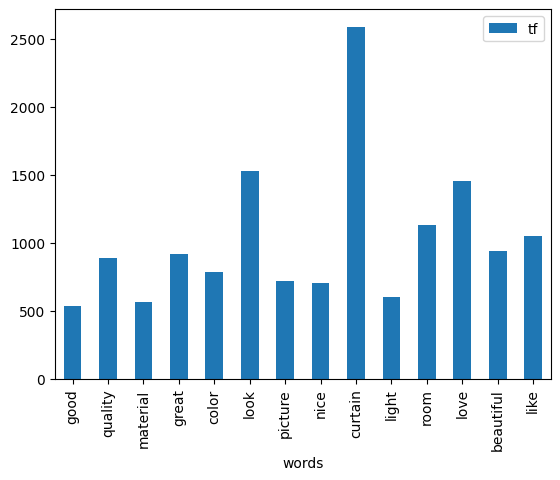

In [13]:
#Barplot
import matplotlib.pyplot as plt

tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

## WorldCloud Görselleştirme İşlemi

In [14]:
text = " ".join(i for i in df.Review)
print(text)

happy good quality material however panel product fun bedroom windowsbr imagery bit stretched still material lightweight sheer appreciate lo que e que un poco ma great bang buck cant believe quality material vibrant color style work beautifully tie together look different photo exactly looking heavy material great price fast looking picture thought curtain would thinner sheer nice thickness weight help insulate front window look absolutely perfect arrived quickly pleased purchase much thought would wasnt really expecting wanting use curtain picture show rd set ambesonne curtain one set use spring summer one autumn set christmas winter durable color vibrant recommend curtain block view living room front door area dont mess easily seen visitor put christmas light around really brightens everything private closed darkening point dont block light work fine night curtain sheer daytime labeled darkening curtain fault ordering  love curtain printed polyester type material back material white 

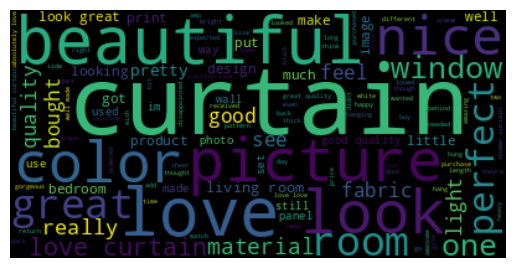

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

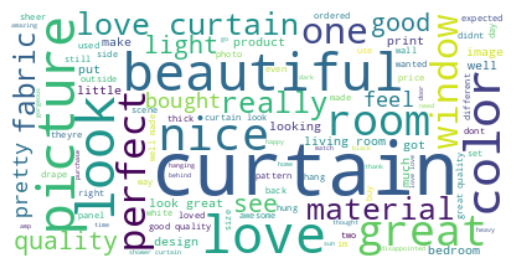

In [16]:
wordcloud = WordCloud(max_font_size=60,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

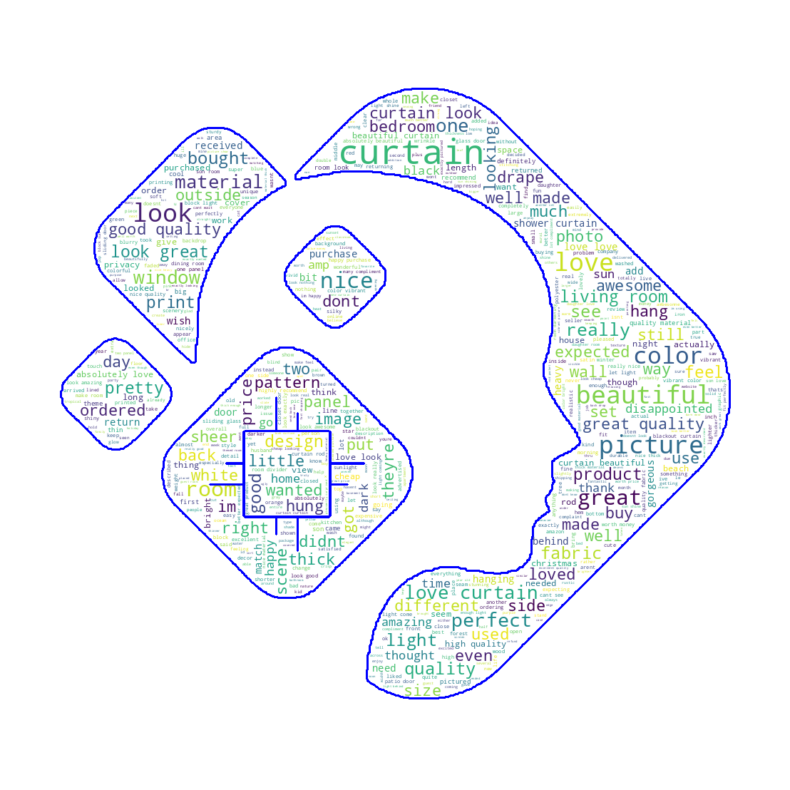

In [17]:
#şablonlara göre WordCloud
from PIL import Image

tr_mask = np.array(Image.open("/content/gdrive/MyDrive/ML DL Kaynakça/NLP/ayzek.png"))

wc = WordCloud(background_color="white",
               max_words=1000,
               mask=tr_mask,
               contour_width=3,
               contour_color="blue")

wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis (Duygu Analizi)

In [18]:
# polarity_scores() hesaplanması
# compound'ta 0'dan büyük bir sayı varsa cümle pozitif, küçükse negatif
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

for sentence in df['Review'].head(10):
  print(sentence)
  print(sia.polarity_scores(sentence))
  print("\n")


happy
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}


good quality material however panel
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}


product fun bedroom windowsbr imagery bit stretched still material lightweight sheer appreciate
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.7184}


lo que e que un poco ma
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


great bang buck cant believe quality material vibrant color style work beautifully tie together
{'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'compound': 0.9042}


look different photo
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


exactly looking heavy material great price fast
{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}


looking picture thought curtain would thinner sheer nice thickness weight help insulate front window look absolutely perfect arrived quickly pleased purchase
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.908}


much thought would wasnt really 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [21]:
x = df['Review'][0:10].apply(lambda x: "positive" if sia.polarity_scores(x)['compound']> 0 else "negative")
print(x.head(10))


0    positive
1    positive
2    positive
3    negative
4    positive
5    negative
6    positive
7    positive
8    negative
9    positive
Name: Review, dtype: object


In [23]:
df["sentiment_label"] = df["Review"].apply(lambda x: "positive" if sia.polarity_scores(x)["compound"]> 0 else "negative")
print(df['sentiment_label'].head(2))

0    positive
1    positive
Name: sentiment_label, dtype: object


In [24]:
df['sentiment_label'].value_counts()

,count
sentiment_label,
positive,4764
negative,847


In [26]:
df.groupby("sentiment_label")["Star"].mean()

,Star
sentiment_label,
negative,3.409681
positive,4.583333


In [27]:
df.head()

,Star,HelpFul,Title,Review,sentiment_label
0,5,0,looks great,happy,positive
1,5,0,Pattern did not align between the two panels.,good quality material however panel,positive
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windowsbr imagery bit stre...,positive
3,5,0,Que se ven elegantes muy finas,lo que e que un poco ma,negative
4,5,0,Wow great purchase,great bang buck cant believe quality material ...,positive


# Machine Learning (Makine Öğrenmesi)

In [29]:
from sklearn.preprocessing import LabelEncoder

df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [30]:
df.head(2)
# pos = 1
# neg = 0

,Star,HelpFul,Title,Review,sentiment_label
0,5,0,looks great,happy,1
1,5,0,Pattern did not align between the two panels.,good quality material however panel,1


In [31]:
y = df["sentiment_label"] #output
X = df["Review"] #input

In [32]:
X.head(1)

,Review
0,happy


In [33]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

tfidf_ngram = TfidfVectorizer(ngram_range = (2,3))
X_tfidf_ngram = tfidf_ngram.fit_transform(X)

In [35]:
X_tfidf.shape

(5611, 2718)

In [41]:
X_tfidf[0]

<1x2718 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [36]:
X_tfidf_ngram.shape

(5611, 85092)

In [42]:
X_tfidf_ngram[0]

<1x85092 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression().fit(X_tfidf, y)

cross_val_score(lr, X_tfidf, y, cv=5).mean()

0.8952052609273288

In [56]:
sentence = df["Review"][10]
sentence_transform = TfidfVectorizer().fit(X).transform([sentence])

predict = lr.predict(sentence_transform)

print(f"Predict Sentence: {sentence}\n Predict: {predict}")


Predict Sentence: block view living room front door area dont mess easily seen visitor put christmas light around really brightens everything
 Predict: [1]


In [67]:
sentence = pd.Series(df["Review"].sample(1).values)
sentence_transform = TfidfVectorizer().fit(X).transform(sentence)

predict = lr.predict(sentence_transform)

print(f"Predict Sentence: {sentence}\n Predict: {predict}")


Predict Sentence: 0    curtain look exactly advertised material flims...
dtype: object
 Predict: [1]


In [68]:
from sklearn.metrics import classification_report

# Test veri seti üzerinde tahmin yapalım (verilen örnekte X, tüm veri seti olarak alınmış).
y_pred = lr.predict(X_tfidf)

# Classification report oluşturalım.
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.55      0.70       847
           1       0.93      1.00      0.96      4764

    accuracy                           0.93      5611
   macro avg       0.95      0.77      0.83      5611
weighted avg       0.93      0.93      0.92      5611



In [74]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate

rf = RandomForestClassifier(random_state = 42)

rf_params = {"max_depth": [8, None],  # max derinlik
             "max_features": [7, "auto"], #bölünmelerde göz önünde bulunacak olan max değişken
             "min_samples_split": [2, 5, 8], # bir yaprakta ne kadar örnek olucak
             "n_estimators": [100, 200]} # kaç tane ağaç eğitilicek

grid = GridSearchCV(rf,
                    rf_params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1).fit(X_tfidf, y)

grid.best_params_

final = rf.set_params(**grid.best_params_, random_state = 42).fit(X_tfidf, y)

cross_val_score(final, X_tfidf, y, cv=5, n_jobs=-1).mean()


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

0.9089302749351986

In [75]:
y_pred = rf.predict(X_tfidf)


report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00      4764

    accuracy                           1.00      5611
   macro avg       1.00      1.00      1.00      5611
weighted avg       1.00      1.00      1.00      5611

